In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/Amazon Sale Report.csv.zip")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
# change the datatype of date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [5]:
#fill null values with mode
df["currency"]=df["currency"].fillna(df["currency"].mode()[0])

In [6]:
# fill null values of amount cloumn with 0 because if it fills with central tendency method it may damage the accuracy of data .
df['Amount'] = df['Amount'].fillna(0)

In [7]:
# fill the null values with not Avaiable to maintain the accuracy of data
df['Courier Status'] = df['Courier Status'].fillna('Not Available')


In [8]:
# removing unnecessary columns
df.drop(columns=['index'], inplace=True)
df.drop(columns=['Unnamed: 22'], inplace=True)



#  1. Order Status Distribution

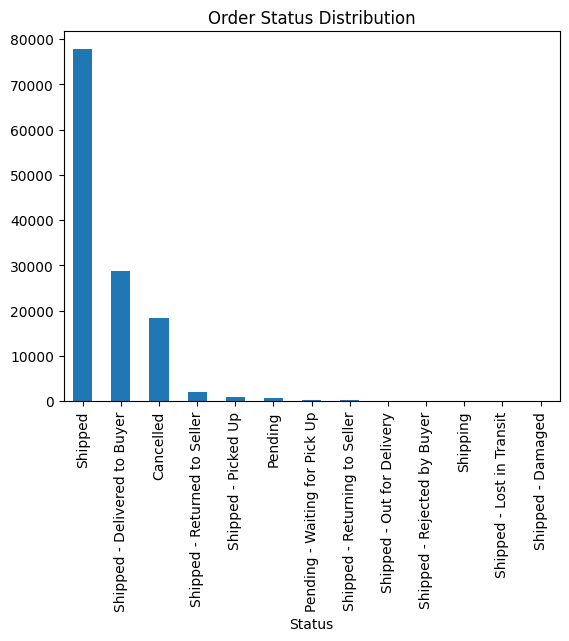

In [9]:

df['Status'].value_counts().plot(kind='bar')
plt.title("Order Status Distribution")
plt.show()

**key insights**  :-


Most of the products are successfully shipped and delivered to customers while smaller amount od orders are cancelled and returned .

# 2. what are the most selling products or which products contribute  most of its share in total revenue of  company?

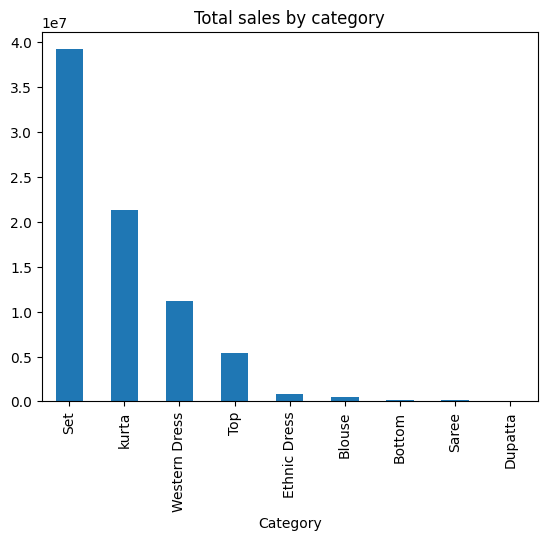

In [10]:
df.groupby('Category')['Amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total sales by category")
plt.show()

**key insights** :-   


from the insights we clearly see that set , kurta and western Dress are highly contribute in the company's revenue.

# 3. what  are the top regions with highest number of orders?

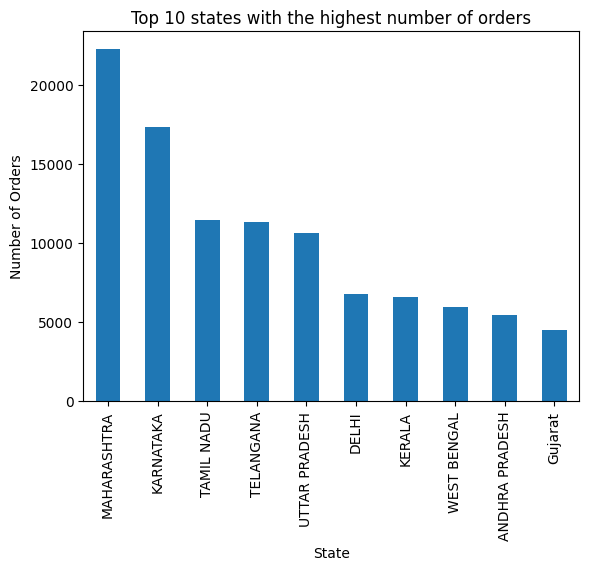

In [11]:
df['ship-state'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 states with the highest number of orders")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.show()

**key insights**:-


A few states contribute the majority of total orders, highlighting key regional markets.

# 4. Seasonal sales Trend

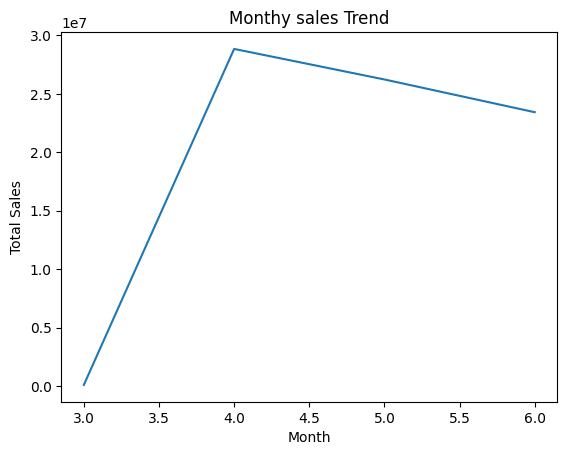

In [12]:
df["month"] = df['Date'].dt.month
df.groupby('month')['Amount'].sum().plot(kind='line')
plt.title("Monthy sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


**key insights**:


Sales show noticeable monthly variation, indicating seasonal buying patterns.
As in 4 month the sales are reached the peak level.

# 5.What is the proportion of B2B vs B2C orders?

In [13]:
df['B2B'] = df['B2B'].map({
    True: 'B2B',
    False: 'B2C'}
)

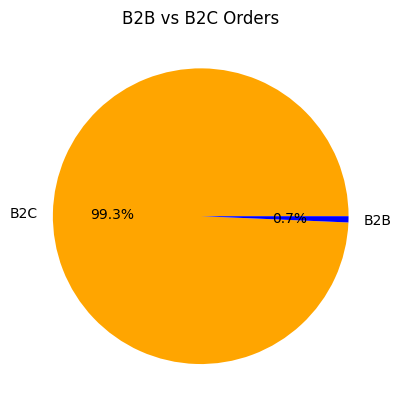

In [14]:
df['B2B'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors = ("orange","blue"))
plt.title('B2B vs B2C Orders')
plt.ylabel('')
plt.show()


**key insights** :-  


The analysis shows that the majority of orders are from B2C customers, while B2B orders contribute a smaller share of total transactions.

# 6. Promotion Impact on sales

In [15]:
# convert messy data into a clean boolean data
df["promotion_flag"] = df["promotion-ids"].notnull()



In [16]:
df['promotion_flag'] = df['promotion_flag'].map({
    True: 'Promotion',
    False: 'No Promotion'
})

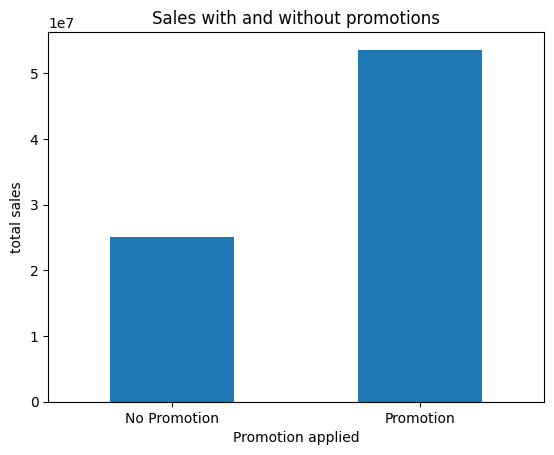

In [17]:

df.groupby("promotion_flag")['Amount'].sum().plot(kind= "bar")
plt.title("Sales with and without promotions")
plt.xlabel("Promotion applied")
plt.ylabel("total sales")
plt.xticks(rotation = 0)
plt.show()

**key insights** :-

 The analysis shows that promotional orders contribute a higher share of total sales, indicating the effectiveness of promotional campaigns.

# 7. Courier Status

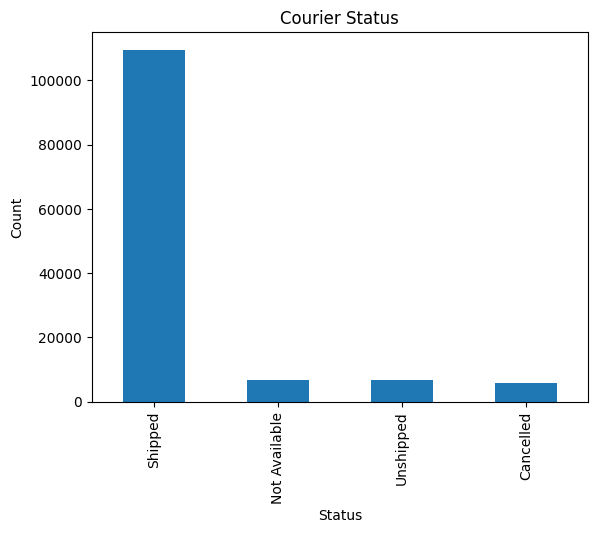

In [18]:
df["Courier Status"].value_counts().plot(kind = "bar")
plt.title("Courier Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

**key insights :- **   


A small portion of orders have missing courier information, indicating data tracking gaps